In [1]:
import numpy as np 
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('parkinsons.data')
df.drop('name',axis=1,inplace=True)
df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [3]:
#basic ourview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

changing type from int64 to int8 to reduce memory

In [4]:
df['status']=df['status'].astype('int8')

In [5]:
#statistical ourview of the data
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [6]:
df['status'].unique()

array([1, 0], dtype=int8)

<Axes: xlabel='status'>

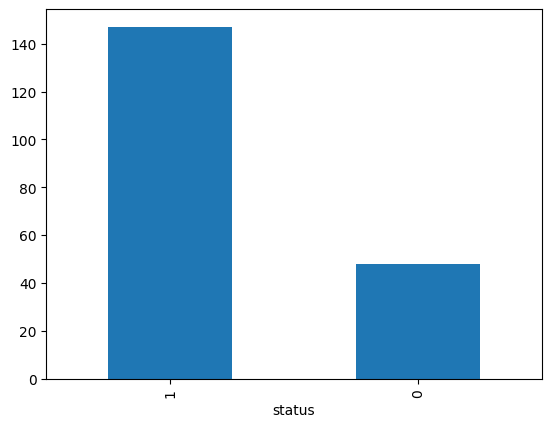

In [7]:
#data is almost balanced
df['status'].value_counts().plot(kind='bar')

In [8]:
#no duplicated rows are in data
df[df.duplicated()]

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


correlation between all the columns

In [9]:
df.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


<Axes: >

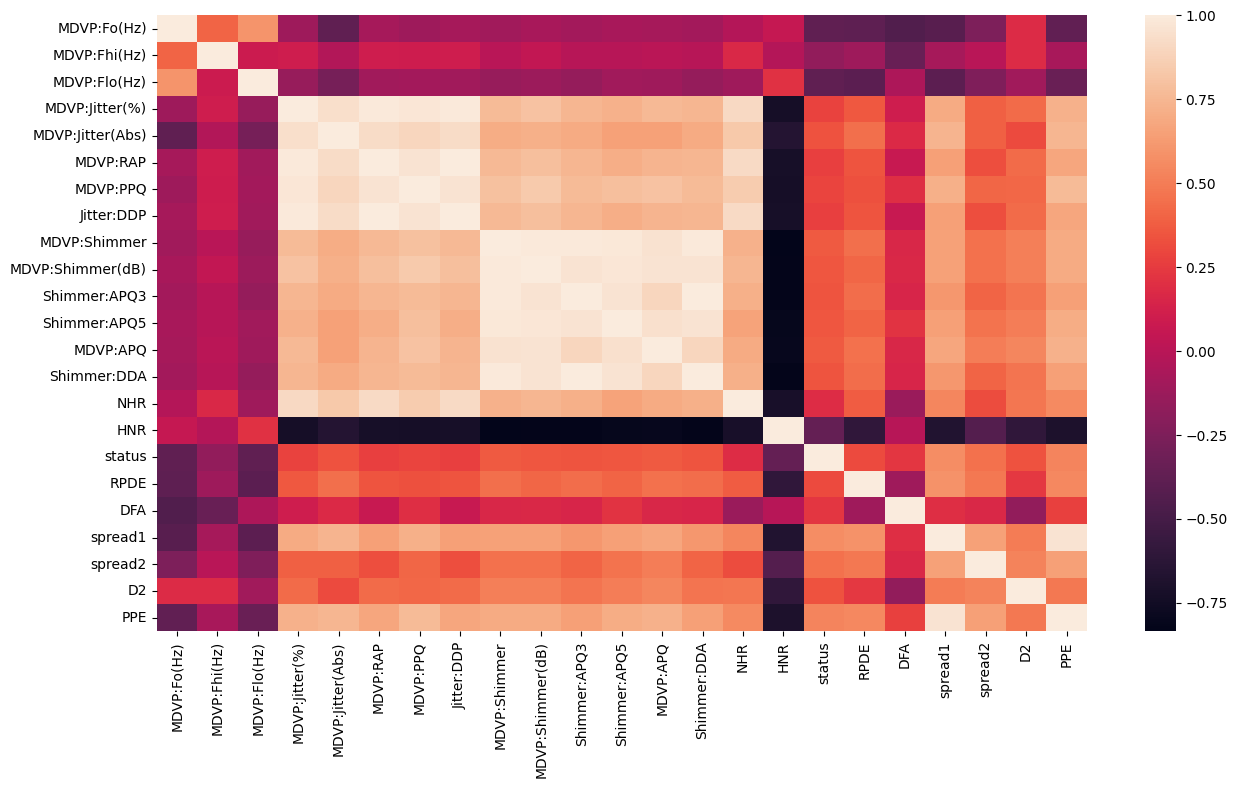

In [10]:
#correlation in graph
plt.figure(figsize=(15,8))
sns.heatmap(data=df.corr())

In [11]:
#function to check distribution of columns
def dist_checker(col_nam):
    sns.distplot(col_nam)

C:\Users\MSI\AppData\Local\Temp\ipykernel_10416\4099528263.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(col_nam)


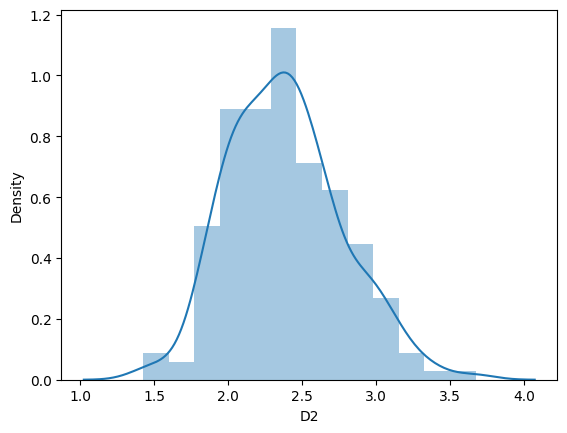

In [12]:
dist_checker(df['D2'])

In [13]:
#function to show relation in graph
def scat_plot(x_col,y_col):
    sns.scatterplot(x=x_col,y=y_col)

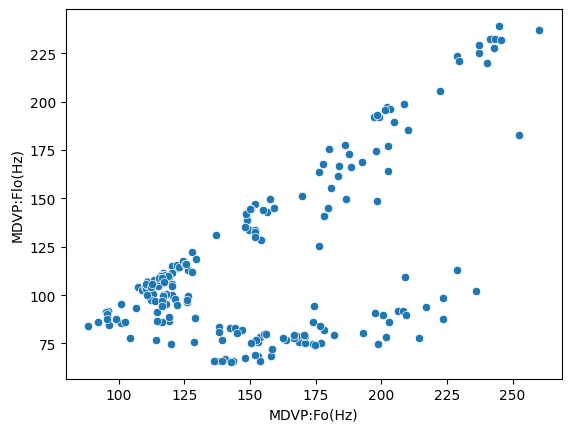

In [14]:
scat_plot(df['MDVP:Fo(Hz)'],df['MDVP:Flo(Hz)'])

In [15]:
x=df.drop(columns='status')
y=df['status']

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [17]:
x_train.shape

(156, 22)

In [18]:
x_test.shape

(39, 22)

In [19]:
#applying minmaxscaler to normalize features
from sklearn.preprocessing import MinMaxScaler
normalizer=MinMaxScaler()
x_train=normalizer.fit_transform(x_train)
x_test=normalizer.transform(x_test)

In [20]:
from sklearn.metrics import confusion_matrix,classification_report

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble._bagging import BaggingClassifier
from sklearn.ensemble._voting import VotingClassifier
from sklearn.ensemble._stacking import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [22]:
estimators=[('lr',LogisticRegression()),('svc',SVC()),('dtc',DecisionTreeClassifier())]

In [23]:
# first take all the models 
models = {'logistic_regression':LogisticRegression(),
         'support_vector_classifier':SVC(),
         'decision_tree_classifier':DecisionTreeClassifier(),
         'random_forest_classifier':RandomForestClassifier(),
         'bagging_classifier':BaggingClassifier(),
         'voting_classifier':VotingClassifier(estimators=estimators),
         'stacking_classifier':StackingClassifier(estimators=estimators),
         'adaboost_classifier':AdaBoostClassifier(),
         'gradient_boost_classifier':GradientBoostingClassifier(),
         'knn-classifier':KNeighborsClassifier(),
         'xgboost-classifier':XGBClassifier()
         } 
# iterating one by one
for i in range(len(list(models))):
    # taking one model from dict
    model=list(models.values())[i]
    # training the model
    model.fit(x_train,y_train)
    # making the prediction 
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    # checking the perfomance
    print(list(models.keys())[i])
    print('model perfomance on trianing data')
    print(classification_report(y_train_pred,y_train))
    print('----------------------------------------------------')
    print(confusion_matrix(y_train_pred,y_train))
    print('model perfomance on testing data')
    print(classification_report(y_test_pred,y_test))    
    print(confusion_matrix(y_test_pred,y_test))






    

logistic_regression
model perfomance on trianing data
              precision    recall  f1-score   support

           0       0.42      0.71      0.53        24
           1       0.94      0.83      0.88       132

    accuracy                           0.81       156
   macro avg       0.68      0.77      0.71       156
weighted avg       0.86      0.81      0.83       156

----------------------------------------------------
[[ 17   7]
 [ 23 109]]
model perfomance on testing data
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.97      0.98        32

    accuracy                           0.97        39
   macro avg       0.94      0.98      0.96        39
weighted avg       0.98      0.97      0.98        39

[[ 7  0]
 [ 1 31]]
support_vector_classifier
model perfomance on trianing data
              precision    recall  f1-score   support

           0       0.45      1.00      0.62      

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
gridparam = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
              'learning_rate': [0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
              'algorithm': ['SAMME', 'SAMME.R']}
gridsearch = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=gridparam, cv=10, n_jobs=1, scoring='accuracy')
gridsearch.fit(x_train, y_train)
gridsearch.best_params_, gridsearch.best_score_


({'algorithm': 'SAMME', 'learning_rate': 0.9, 'n_estimators': 100},
 0.8908333333333335)

In [32]:
adaboostC = AdaBoostClassifier(n_estimators=100,learning_rate=0.9,algorithm='SAMME.R')
adaboostC.fit(x_train,y_train)
y_pred = adaboostC.predict(x_test)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.97      0.98        32

    accuracy                           0.97        39
   macro avg       0.94      0.98      0.96        39
weighted avg       0.98      0.97      0.98        39

[[ 7  0]
 [ 1 31]]


In [27]:
gradient_param = {'n_estimators':[10,20,30,40,50,60,70,80,90,110,120],
                 'learning_rate':[0.01,0.09,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
gradient_tuning = GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=gradient_param,cv=5,n_jobs=1,scoring='f1')
gradient_tuning.fit(x_train,y_train)
gradient_tuning.best_params_, gradient_tuning.best_score_


({'learning_rate': 0.8, 'n_estimators': 80}, 0.9457338254450717)

In [28]:
#gradient boosting is perfoming well 
y_pred = gradient_tuning.predict(x_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.97      0.97      0.97        31

    accuracy                           0.95        39
   macro avg       0.92      0.92      0.92        39
weighted avg       0.95      0.95      0.95        39



In [29]:
confusion_matrix(y_pred,y_test)

array([[ 7,  1],
       [ 1, 30]], dtype=int64)